In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from typing import TypedDict, Annotated

from langgraph.graph import StateGraph, add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.checkpoint.memory import MemorySaver

from langchain_openai import ChatOpenAI
from langchain_community.tools import TavilySearchResults

memory = MemorySaver()

tool = TavilySearchResults(max_results=2)
tools = [tool]
tool_node = ToolNode(tools)

llm = ChatOpenAI(model="gpt-4o-mini")
llm_with_tools = llm.bind_tools(tools)

In [3]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

def chatbot(state: State):
    result = llm_with_tools.invoke(state["messages"])
    return {"messages": [result]}



In [7]:
graph_builder = StateGraph(State)

graph_builder.add_node("chatbot", chatbot)
graph_builder.add_node("tools", tool_node)

graph_builder.add_edge("tools", "chatbot")
graph_builder.add_conditional_edges("chatbot", tools_condition)

graph_builder.set_entry_point("chatbot")

graph = graph_builder.compile(checkpointer=memory)

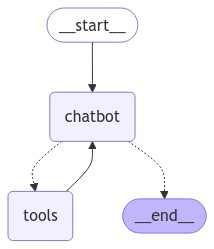

In [8]:
from IPython.display import display, Image

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass


In [9]:
config = {"configurable": {"thread_id": "jaeho"}}
graph.invoke({"messages": [{"role": "user", "content": "내가 한 첫 질문이 뭐였어?"}]},
             config)

{'messages': [HumanMessage(content='내가 한 첫 질문이 뭐였어?', id='b8d91eac-7fd4-4167-a186-da4331d96db4'),
  AIMessage(content='첫 질문은 "내가 한 첫 질문이 뭐였어?"였습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 89, 'total_tokens': 106, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f85bea6784', 'finish_reason': 'stop', 'logprobs': None}, id='run-8f1cbd22-834d-4382-bd3b-54985e99c859-0', usage_metadata={'input_tokens': 89, 'output_tokens': 17, 'total_tokens': 106})]}

In [10]:
config = {"configurable": {"thread_id": "jaeho"}}
graph.invoke({"messages": [{"role": "user", "content": "내가 한 첫 질문이 뭐였어?"}]},
             config)

{'messages': [HumanMessage(content='내가 한 첫 질문이 뭐였어?', id='b8d91eac-7fd4-4167-a186-da4331d96db4'),
  AIMessage(content='첫 질문은 "내가 한 첫 질문이 뭐였어?"였습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 89, 'total_tokens': 106, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f85bea6784', 'finish_reason': 'stop', 'logprobs': None}, id='run-8f1cbd22-834d-4382-bd3b-54985e99c859-0', usage_metadata={'input_tokens': 89, 'output_tokens': 17, 'total_tokens': 106}),
  HumanMessage(content='내가 한 첫 질문이 뭐였어?', id='55f122e8-adff-4af7-8327-b58c4efa9463'),
  AIMessage(content='당신이 한 첫 질문은 "내가 한 첫 질문이 뭐였어?"였습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 123, 'total_tokens': 144, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp

In [11]:
config = {"configurable": {"thread_id": "jaeho"}}
graph.invoke({"messages": [{"role": "user", "content": "내 이름은 재호야"}]},
             config)

{'messages': [HumanMessage(content='내가 한 첫 질문이 뭐였어?', id='b8d91eac-7fd4-4167-a186-da4331d96db4'),
  AIMessage(content='첫 질문은 "내가 한 첫 질문이 뭐였어?"였습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 89, 'total_tokens': 106, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f85bea6784', 'finish_reason': 'stop', 'logprobs': None}, id='run-8f1cbd22-834d-4382-bd3b-54985e99c859-0', usage_metadata={'input_tokens': 89, 'output_tokens': 17, 'total_tokens': 106}),
  HumanMessage(content='내가 한 첫 질문이 뭐였어?', id='55f122e8-adff-4af7-8327-b58c4efa9463'),
  AIMessage(content='당신이 한 첫 질문은 "내가 한 첫 질문이 뭐였어?"였습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 123, 'total_tokens': 144, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp

In [12]:
config = {"configurable": {"thread_id": "jaeho"}}
graph.invoke({"messages": [{"role": "user", "content": "내 세번째 질문은 뭐였어?"}]},
             config)

{'messages': [HumanMessage(content='내가 한 첫 질문이 뭐였어?', id='b8d91eac-7fd4-4167-a186-da4331d96db4'),
  AIMessage(content='첫 질문은 "내가 한 첫 질문이 뭐였어?"였습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 89, 'total_tokens': 106, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f85bea6784', 'finish_reason': 'stop', 'logprobs': None}, id='run-8f1cbd22-834d-4382-bd3b-54985e99c859-0', usage_metadata={'input_tokens': 89, 'output_tokens': 17, 'total_tokens': 106}),
  HumanMessage(content='내가 한 첫 질문이 뭐였어?', id='55f122e8-adff-4af7-8327-b58c4efa9463'),
  AIMessage(content='당신이 한 첫 질문은 "내가 한 첫 질문이 뭐였어?"였습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 123, 'total_tokens': 144, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp

In [13]:
config = {"configurable": {"thread_id": "jaeho"}}
graph.invoke({"messages": [{"role": "user", "content": "내 이름이 뭐라고?"}]},
             config)

{'messages': [HumanMessage(content='내가 한 첫 질문이 뭐였어?', id='b8d91eac-7fd4-4167-a186-da4331d96db4'),
  AIMessage(content='첫 질문은 "내가 한 첫 질문이 뭐였어?"였습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 89, 'total_tokens': 106, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f85bea6784', 'finish_reason': 'stop', 'logprobs': None}, id='run-8f1cbd22-834d-4382-bd3b-54985e99c859-0', usage_metadata={'input_tokens': 89, 'output_tokens': 17, 'total_tokens': 106}),
  HumanMessage(content='내가 한 첫 질문이 뭐였어?', id='55f122e8-adff-4af7-8327-b58c4efa9463'),
  AIMessage(content='당신이 한 첫 질문은 "내가 한 첫 질문이 뭐였어?"였습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 123, 'total_tokens': 144, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp

In [16]:
#웹검색
config = {"configurable": {"thread_id": "1"}}
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": ("user", user_input)}, config):
        for value in event.values():
            print("User: ", user_input)
            print("Assistant: ", value["messages"][-1].content)

User:  현재 대한민국의 대통령은 누구야?
Assistant: 
User:  현재 대한민국의 대통령은 누구야?
Assistant: [{"url": "https://namu.wiki/w/\ub300\ud55c\ubbfc\uad6d \ub300\ud1b5\ub839", "content": "\ub300\ud55c\ubbfc\uad6d \ub300\ud1b5\ub839\uc740 \ub300\ud55c\ubbfc\uad6d\uc758 \ub300\ud1b5\ub839 \uae30\uad00(\u6a5f\u95dc)\u00b7\uc9c1\uc704(\u8077\u4f4d) \ubc0f \uc774\ub97c \uc218\ud589\ud558\ub294 \uc778\ubb3c\uc744 \uac00\ub9ac\ud0a8\ub2e4. \ub300\ud55c\ubbfc\uad6d\uc758 \ud604\uc9c1 \ub300\ud1b5\ub839\uc740 \uc81c20\ub300 \uc724\uc11d\uc5f4\uc774\uba70, \uc784\uae30\ub294 2022\ub144 5\uc6d4 10\uc77c\ubd80\ud130 2027\ub144 5\uc6d4 9\uc77c\uae4c\uc9c0\uc774\ub2e4. \ub300\ud1b5\ub839\uc740 \ub300\ud55c\ubbfc\uad6d \ud5cc\ubc95 \uc81c66\uc870\uc5d0\uc11c \uc815\uc758\ud558\ub294 \ud5cc\ubc95\uae30\uad00\uc73c\ub85c, \uad6d\uac00\uc6d0\uc218 [\uc6d0]\ub85c\uc11c \uc678\uad6d\uc5d0 \ub300\ud558\uc5ec \uad6d\uac00\ub97c ..."}, {"url": "https://namu.wiki/w/\ub300\ud55c\ubbfc\uad6d \ub300\ud1b5\ub839/\uba85\ub2e8", "content":

In [18]:
# 대화 기록들
snapshot = graph.get_state(config)
print(snapshot)

StateSnapshot(values={'messages': [HumanMessage(content='안녕', id='e053db02-5095-4d82-9f66-6940de58c65f'), AIMessage(content='안녕하세요! 어떻게 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 81, 'total_tokens': 92, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f85bea6784', 'finish_reason': 'stop', 'logprobs': None}, id='run-babf595e-e6c7-4458-8788-19853babbd50-0', usage_metadata={'input_tokens': 81, 'output_tokens': 11, 'total_tokens': 92}), HumanMessage(content='내이름은 재호야', id='3a92cc2e-6ba8-4f77-8364-589cac33d06a'), AIMessage(content='재호님, 반갑습니다! 무엇을 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 106, 'total_tokens': 123, 'completion_tokens_details': {'reasoning_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f85bea6784', 'finish_reason

# 기억할 메세지 개수 제한하기

In [ ]:
# 메세지를 리스트로 받았을때 2개만 받기. 이 함수를 chatbot에 넣어서 최근 2개만 기억하도록 한다.